In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import json
from src.pipeline_functions.data_preprocessing_functions import *

In [23]:
train_data_chrome = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/train_set_processed.parquet.gzip"
)

# data = pd.read_parquet(
#     "../data/processed/chrome/03_29_2023/merged_data_processed.parquet.gzip",
#     engine="pyarrow", dtype_backend="pyarrow",
# )

data = pd.read_parquet(
    "../data/processed/firefox/08_12_2022/merged_data_processed.parquet.gzip"
)

# test_data_brave = pd.read_parquet(
#     "../data/processed/brave/08_12_2022/test_set_all_processed.parquet.gzip"
# )
# test_data_firefox = pd.read_parquet(
#     "../data/processed/firefox/08_12_2022/test_set_01_processed.parquet.gzip"
# )

In [3]:
train_data_chrome

,x-77-nzt,x-ua-device,x-amz-request-id,x-cdn-cache,x-aspnet-version,content-security-policy-report-only,x-cache,x-goog-stored-content-encoding,x-edgeconnect-origin-mex-latency,x-version,...,cdn-storageserver,content-encoding,x-goog-generation,accept-ch,x-cache-hit,x-server,access-control-expose-headers,tracker,comb_col_non_tracker,comb_col_tracker
0,<NA>,<NA>,mdp0txragrjyr5kj,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,2,0
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,hit,<NA>,<NA>,<NA>,...,<NA>,gzip,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,gzip,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,0
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,miss from cloudfront,<NA>,<NA>,<NA>,...,<NA>,gzip,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556443,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,0
556444,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"content-length,etag,server-timing,x-content-ty...",0,2,0
556445,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,0
556446,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,0


In [9]:
data

,x-77-nzt,x-ua-device,x-amz-request-id,x-cdn-cache,x-aspnet-version,content-security-policy-report-only,x-cache,x-goog-stored-content-encoding,x-edgeconnect-origin-mex-latency,x-version,...,cdn-storageserver,content-encoding,x-goog-generation,accept-ch,x-cache-hit,x-server,access-control-expose-headers,comb_col_non_tracker,comb_col_tracker,tracker
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,identity,<NA>,<NA>,...,<NA>,<NA>,1654163921134681,<NA>,<NA>,<NA>,<NA>,3,0,0
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,identity,<NA>,<NA>,...,<NA>,br,1654163920906169,<NA>,<NA>,<NA>,<NA>,2,0,0
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,identity,<NA>,<NA>,...,<NA>,<NA>,1654163920760920,<NA>,<NA>,<NA>,<NA>,3,0,0
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,identity,<NA>,<NA>,...,<NA>,<NA>,1654163920862576,<NA>,<NA>,<NA>,<NA>,3,0,0
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,br,<NA>,<NA>,<NA>,<NA>,"x-ms-request-id,server,x-ms-version,content-ty...",4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836251,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,1
836252,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,1
836253,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,1
836254,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,config_nocache,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,"sec-ch-ua-arch, sec-ch-ua-bitness, sec-ch-ua-f...",<NA>,<NA>,<NA>,0,0,1


In [10]:
print(train_data_chrome.tracker.value_counts() / len(train_data_chrome))
print(data.tracker.value_counts() / len(data))
# print(test_data_brave.tracker.value_counts() / len(test_data_brave))

tracker
0    0.701647
1    0.298353
Name: count, dtype: double[pyarrow]
tracker
0    0.630028
1    0.369972
Name: count, dtype: double[pyarrow]


/var/folders/9d/nsz99yhs1x96zmzyxprq_hnw0000gn/T/ipykernel_1766/1459054013.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([''], fontsize=14)


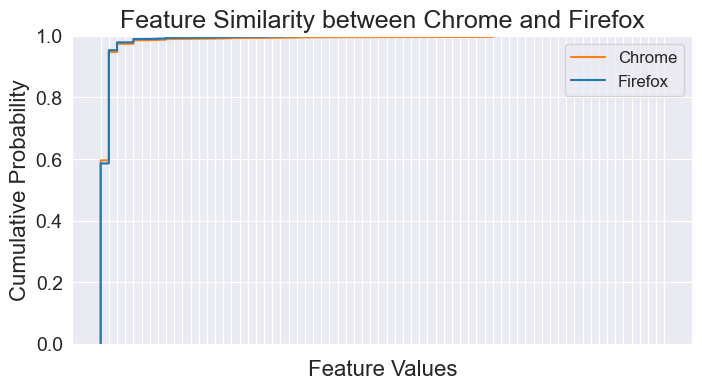

In [11]:
feature = 'x-xss-protection'
df = pd.DataFrame({
    feature: np.concatenate(
        (train_data_chrome.loc[:, feature], data.loc[:, feature])),
    'set': ['training'] * train_data_chrome.shape[0] + ['test'] * data.shape[0]
})

plt.figure(figsize=(8, 4))
g = sns.ecdfplot(data=df, x=feature, hue='set', log_scale=False, legend=False)

plt.title('Feature Similarity between Chrome and Firefox', fontsize=18)
plt.xlabel('Feature Values', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
g.set_xticklabels([''], fontsize=14)
plt.legend(labels=['Chrome', 'Firefox'], fontsize=12)
plt.show()

In [52]:
def split_features(df):
    num_features = df.select_dtypes(include=[np.number]).columns
    cat_features = df.select_dtypes(exclude=[np.number]).columns
    return num_features, cat_features


def feature_analysis(df):
    num_features, cat_features = split_features(df)
    desc_stats_num = df[num_features].describe().transpose()
    desc_stats_cat = df[cat_features].describe().transpose()
    return pd.concat([desc_stats_num, desc_stats_cat], axis=0)

In [53]:
feature_analysis(train_data_chrome)

,count,mean,std,min,25%,50%,75%,max,unique,top,freq
x-edgeconnect-origin-mex-latency,1290.0,380.32093,310.600963,1.0,69.25,357.5,629.0,2977.0,NaN,NaN,NaN
x-fb-trip-id,385.0,1212071437.771429,530646925.907827,382461245.0,686109401.0,917726464.0,1718053925.0,2050670934.0,NaN,NaN,NaN
content-length,430024.0,43050.456135,445356.324,0.0,321.0,4307.0,23568.0,76343204.0,NaN,NaN,NaN
x-fastly-to-nlb-rtt,319.0,14269.109718,13716.284323,6340.0,7417.0,9364.0,18049.0,196713.0,NaN,NaN,NaN
cdn-fileserver,537.0,328.75419,94.685611,36.0,297.0,358.0,400.0,423.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
content-encoding,261631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,gzip,186031
accept-ch,7190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,sec-ch-ua-wow64,2032
x-cache-hit,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,hit,587
x-server,2293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325,imagekit.io,338


In [54]:
feature_analysis(data)

,count,mean,std,min,25%,50%,75%,max,unique,top,freq
x-fb-trip-id,4263.0,976381483.070373,412047866.955142,382461245.0,686109401.0,917726464.0,917726464.0,2050670934.0,NaN,NaN,NaN
content-length,635549.0,48077.77704,438635.252613,0.0,365.0,4732.0,25344.0,75618429.0,NaN,NaN,NaN
x-fastly-to-nlb-rtt,372.0,12593.02957,12575.10287,6528.0,7478.25,8673.0,14103.0,193897.0,NaN,NaN,NaN
cdn-fileserver,812.0,330.912562,92.322031,36.0,297.0,358.0,383.0,423.0,NaN,NaN,NaN
x-goog-metageneration,10361.0,1.474182,3.597234,1.0,1.0,1.0,1.0,169.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
content-encoding,403026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,gzip,286957
accept-ch,9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,"sec-ch-ua-arch, sec-ch-ua-bitness, sec-ch-ua-f...",2873
x-cache-hit,1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1,583
x-server,3476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,imagekit.io,334


In [57]:
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

In [59]:
def check_correlation_with_target(df, target):
    num_features, cat_features = split_features(df)
    correlations_num = {}
    for f in num_features:
        feature_no_na = df[f].fillna(-999)  # impute missing numerical values with -999
        correlations_num[f] = pointbiserialr(feature_no_na, df[target])[0]

    correlations_cat = {}
    for f in cat_features:
        if df[f].nunique() <= 20:  # consider only low cardinality features for chi2 test
            feature_no_na = df[f].astype('object').fillna('missing')  # impute missing categorical values with 'missing'
            cont_table = pd.crosstab(feature_no_na, df[target])
            _, p, _, _ = chi2_contingency(cont_table)
            if p < 0.05:  # p-value < 0.05 implies a significant correlation
                correlations_cat[f] = p
    return correlations_num, correlations_cat

In [60]:
correlations_num, correlations_cat = check_correlation_with_target(train_data_chrome, 'tracker')

In [62]:
correlations_num

{'x-edgeconnect-origin-mex-latency': 0.022661875713126327,
 'x-fb-trip-id': -0.005032787051521203,
 'content-length': -0.03980168684353677,
 'x-fastly-to-nlb-rtt': 0.015617872767474835,
 'cdn-fileserver': 0.003759257451372429,
 'x-goog-metageneration': -0.01617507863591325,
 'cdn-pullzone': -0.01220806479582359,
 'x-edgeconnect-midmile-rtt': 0.0161343610663123,
 'cdn-status': -0.008303935890946454,
 'cdn-requestpullcode': -0.009918473855953994,
 'x-pinterest-rid': 0.027191854411537732,
 'x-vcl-time-ms': 0.008088407813360877,
 'server-processing-duration-in-ticks': 0.014253631937657125,
 'abp': 0.035439438777291776,
 'x-envoy-upstream-service-time': 0.016835887025350084,
 'accept-ch-lifetime': -0.008662468988046505,
 'x-goog-generation': -0.03627850929724398,
 'tracker': 1.0,
 'comb_col_non_tracker': -0.3354842421310982,
 'comb_col_tracker': 0.16085757089402342}

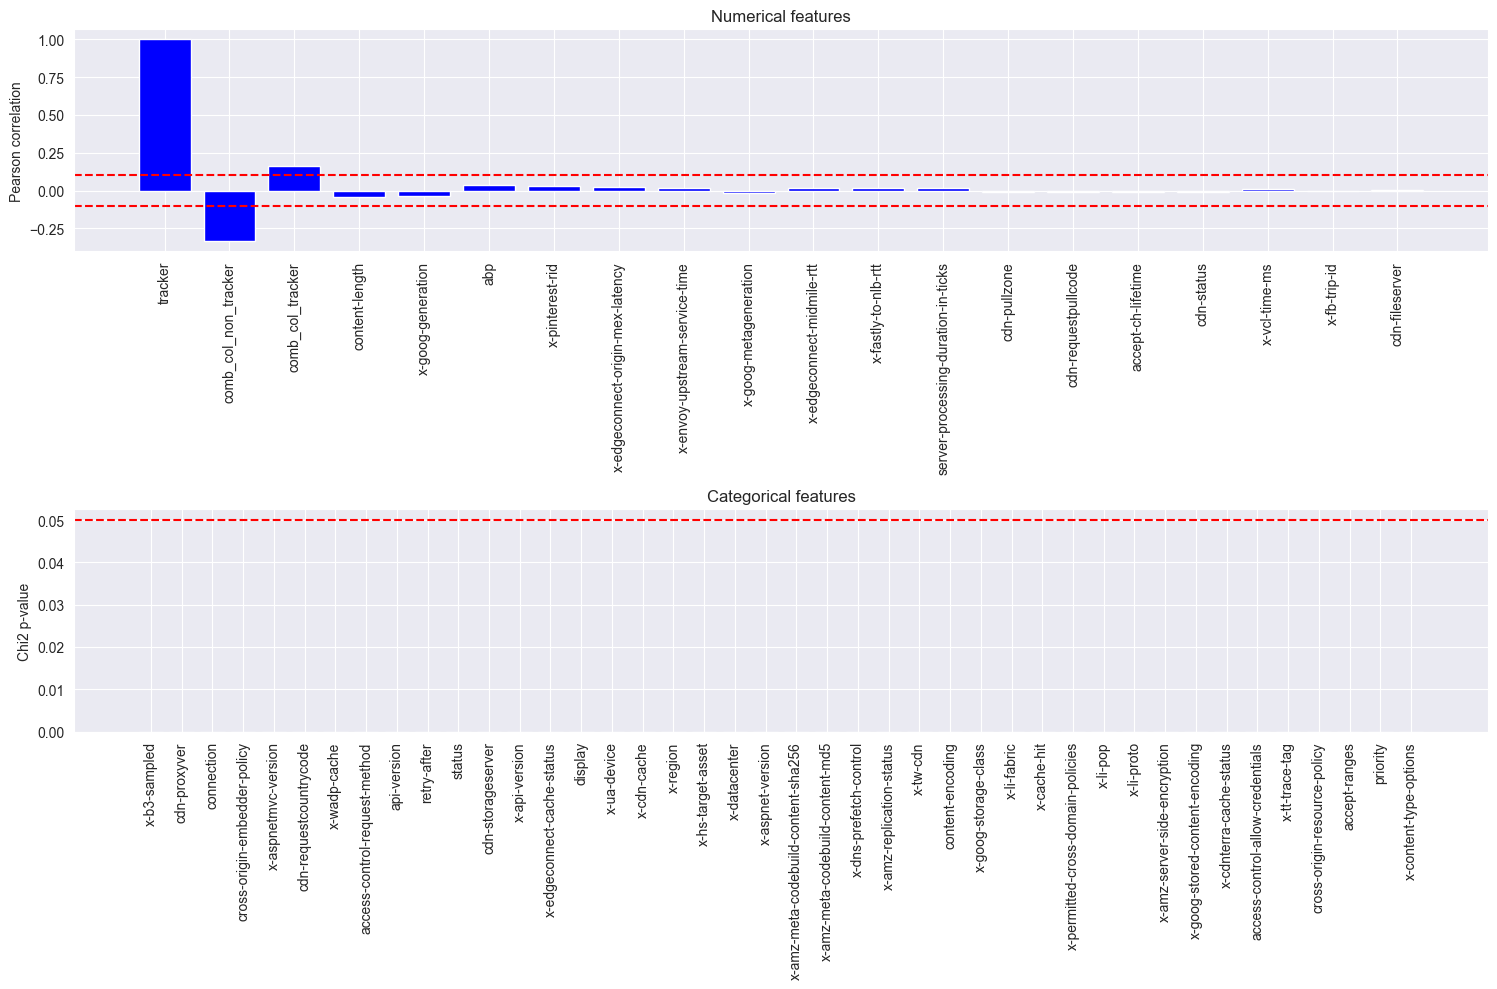

In [67]:
def plot_correlations(correlations_num, correlations_cat):
    # sort features by absolute correlation
    correlations_num = {k: v for k, v in sorted(correlations_num.items(), key=lambda item: abs(item[1]), reverse=True)}
    correlations_cat = {k: v for k, v in sorted(correlations_cat.items(), key=lambda item: abs(item[1]), reverse=True)}

    fig, axs = plt.subplots(2, 1, figsize=(15,10))

    axs[0].bar(correlations_num.keys(), correlations_num.values(), color='b')
    axs[0].set_title('Numerical features')
    axs[0].set_ylabel('Pearson correlation')
    axs[0].axhline(y=0.1, color='r', linestyle='--')  # add line for significance threshold
    axs[0].axhline(y=-0.1, color='r', linestyle='--')  # add line for significance threshold
    axs[0].tick_params(axis='x', rotation=90)

    axs[1].bar(correlations_cat.keys(), correlations_cat.values(), color='g')
    axs[1].set_title('Categorical features')
    axs[1].set_ylabel('Chi2 p-value')
    axs[1].axhline(y=0.05, color='r', linestyle='--')  # add line for significance threshold
    axs[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

plot_correlations(correlations_num, correlations_cat)

In [66]:
correlations_num

{'x-edgeconnect-origin-mex-latency': 0.022661875713126327,
 'x-fb-trip-id': -0.005032787051521203,
 'content-length': -0.03980168684353677,
 'x-fastly-to-nlb-rtt': 0.015617872767474835,
 'cdn-fileserver': 0.003759257451372429,
 'x-goog-metageneration': -0.01617507863591325,
 'cdn-pullzone': -0.01220806479582359,
 'x-edgeconnect-midmile-rtt': 0.0161343610663123,
 'cdn-status': -0.008303935890946454,
 'cdn-requestpullcode': -0.009918473855953994,
 'x-pinterest-rid': 0.027191854411537732,
 'x-vcl-time-ms': 0.008088407813360877,
 'server-processing-duration-in-ticks': 0.014253631937657125,
 'abp': 0.035439438777291776,
 'x-envoy-upstream-service-time': 0.016835887025350084,
 'accept-ch-lifetime': -0.008662468988046505,
 'x-goog-generation': -0.03627850929724398,
 'tracker': 1.0,
 'comb_col_non_tracker': -0.3354842421310982,
 'comb_col_tracker': 0.16085757089402342}

In [68]:
def compute_correlation_matrix(df):
    num_features, cat_features = split_features(df)
    corr_matrix = df[num_features].corr()
    return corr_matrix

In [69]:
compute_correlation_matrix(train_data_chrome)

,x-edgeconnect-origin-mex-latency,x-fb-trip-id,content-length,x-fastly-to-nlb-rtt,cdn-fileserver,x-goog-metageneration,cdn-pullzone,x-edgeconnect-midmile-rtt,cdn-status,cdn-requestpullcode,x-pinterest-rid,x-vcl-time-ms,server-processing-duration-in-ticks,abp,x-envoy-upstream-service-time,accept-ch-lifetime,x-goog-generation,tracker,comb_col_non_tracker,comb_col_tracker
x-edgeconnect-origin-mex-latency,1.000000,NaN,-0.141328,NaN,NaN,NaN,NaN,-0.402806,NaN,NaN,NaN,NaN,NaN,NaN,0.492915,NaN,NaN,0.555238,-0.378467,NaN
x-fb-trip-id,NaN,1.000000,0.015362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.232976,-0.174447,-0.034596
content-length,-0.141328,0.015362,1.000000,NaN,-0.052755,-0.004859,0.042099,0.048458,-0.009990,0.113057,-0.047788,0.054264,-0.084462,0.010843,0.128685,0.286859,0.076385,-0.047107,0.035992,-0.008974
x-fastly-to-nlb-rtt,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007932,NaN,NaN
cdn-fileserver,NaN,NaN,-0.052755,NaN,1.000000,NaN,0.272366,NaN,-0.035989,-0.087950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055211,-0.108659,NaN
x-goog-metageneration,NaN,NaN,-0.004859,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012330,0.039453,-0.012568,NaN
cdn-pullzone,NaN,NaN,0.042099,NaN,0.272366,NaN,1.000000,NaN,0.051264,0.037974,NaN,NaN,NaN,NaN,NaN,NaN,-0.490931,-0.149477,0.130387,NaN
x-edgeconnect-midmile-rtt,-0.402806,NaN,0.048458,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.391479,NaN,NaN,-0.268449,0.219122,NaN
cdn-status,NaN,NaN,-0.009990,NaN,-0.035989,NaN,0.051264,NaN,1.000000,0.989381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049173,-0.036399,NaN
cdn-requestpullcode,NaN,NaN,0.113057,NaN,-0.087950,NaN,0.037974,NaN,0.989381,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.441641,0.044349,-0.033086,NaN


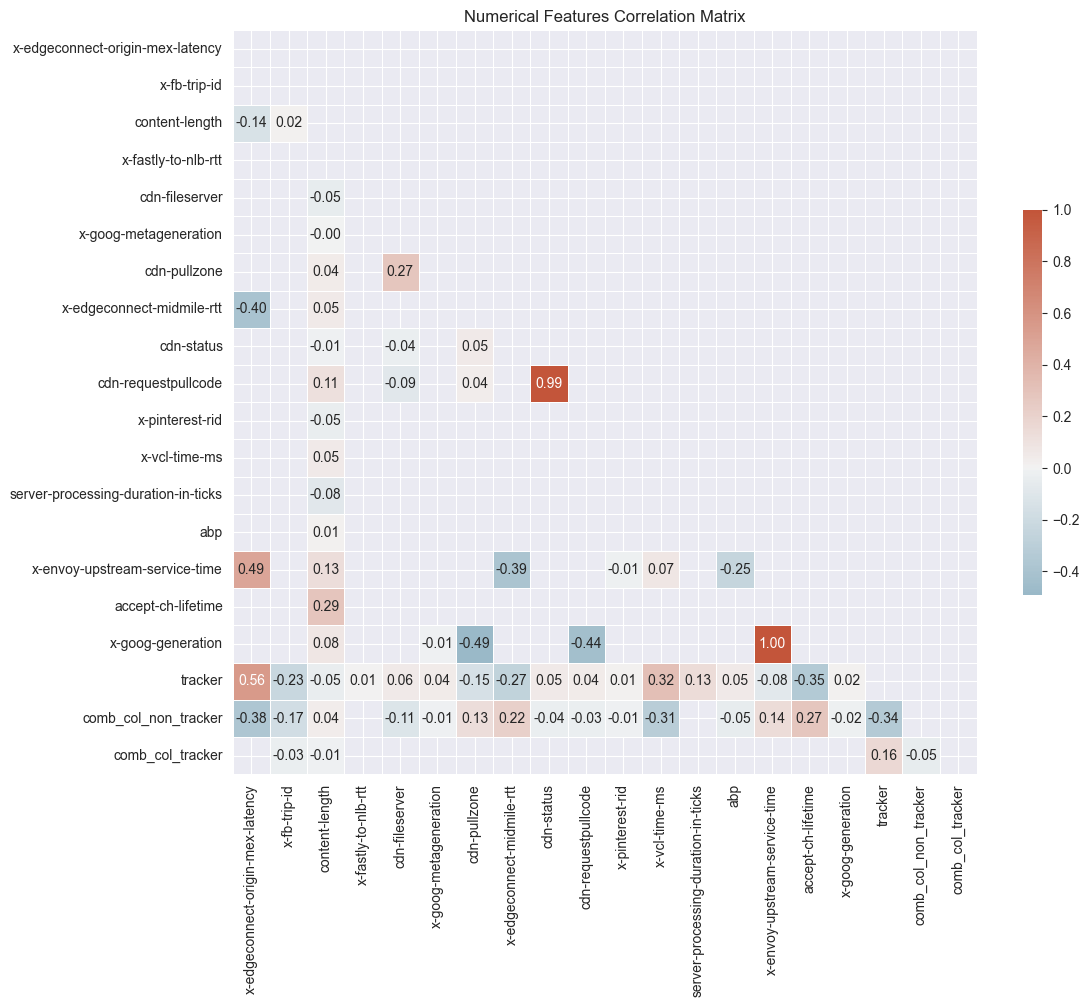

In [71]:
def plot_correlation_matrix(corr_matrix, title='Correlation Matrix'):
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # mask for the upper triangle
    fig, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Generate a custom diverging colormap
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt=".2f",
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    ax.set_title(title)
    plt.show()

num_corr_matrix = compute_correlation_matrix(train_data_chrome)
plot_correlation_matrix(num_corr_matrix, 'Numerical Features Correlation Matrix')

In [74]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)

    # check if confusion matrix is empty
    if confusion_matrix.size == 0:
        return 0

    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def compute_cramers_v_matrix(df):
    num_features, cat_features = split_features(df)
    corr_matrix = pd.DataFrame(index=cat_features, columns=cat_features)
    for col1 in cat_features:
        for col2 in cat_features:
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return corr_matrix

In [75]:
cat_corr_matrix = compute_cramers_v_matrix(train_data_chrome)
plot_correlation_matrix(cat_corr_matrix, 'Categorical Features Correlation Matrix')

/var/folders/9d/nsz99yhs1x96zmzyxprq_hnw0000gn/T/ipykernel_1766/294555387.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/9d/nsz99yhs1x96zmzyxprq_hnw0000gn/T/ipykernel_1766/294555387.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/9d/nsz99yhs1x96zmzyxprq_hnw0000gn/T/ipykernel_1766/294555387.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/9d/nsz99yhs1x96zmzyxprq_hnw0000gn/T/ipykernel_1766/294555387.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/9d/nsz99yhs1x96zmzyxprq_hnw0000gn/T/ipykernel_1766/294555387.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/9d/nsz99yhs1x96zmzyxprq_h

KeyboardInterrupt: 

In [83]:
def compute_chi2_matrix(df, sample_frac=0.1, random_state=42):
    num_features, cat_features = split_features(df)
    chi2_mat = pd.DataFrame(index=cat_features, columns=cat_features)
    pval_mat = pd.DataFrame(index=cat_features, columns=cat_features)

    df_sampled = df.sample(frac=sample_frac, random_state=random_state)

    # Make a copy to avoid changing original DataFrame
    df_filled = df_sampled.copy()

    for col in cat_features:
        # Fill missing values with 'missing'
        df_filled[col] = df_filled[col].astype('object').fillna('missing')

    for col1 in cat_features:
        for col2 in cat_features:
            if col1 == col2:
                chi2_mat.loc[col1, col2] = np.nan
                pval_mat.loc[col1, col2] = np.nan
            else:
                # Compute the chi-square test of independence
                chi2, p, _, _ = chi2_contingency(pd.crosstab(df_filled[col1], df_filled[col2]))
                chi2_mat.loc[col1, col2] = chi2
                pval_mat.loc[col1, col2] = p

    return chi2_mat, pval_mat

In [84]:
chi2_matrix, pval_matrix = compute_chi2_matrix(train_data_chrome)


KeyboardInterrupt

